<a href="https://colab.research.google.com/github/piyushjain08/Resume-Projects/blob/main/Optimised_Twitter_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

In this project, we try to implement a Twitter sentiment analysis model that helps to overcome the challenges of identifying the sentiments of the tweets. The necessary details regarding the dataset are:

The dataset provided is the Sentiment140 Dataset which consists of 1,600,000 tweets that have been extracted using the Twitter API. The various columns present in the dataset are: target, ids,
date,
flag,
user,
text.

## **Introduction**
Sentiment analysis refers to identifying as well as classifying the sentiments that are expressed in the text source. Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.

Therefore we need to develop an **Automated Machine Learning Sentiment Analysis Model** in order to compute the customer perception. Due to the presence of non-useful characters (collectively termed as the noise) along with useful data, it becomes difficult to implement models on them.

In this project, we aim to analyze the sentiment of the tweets provided from the **Sentiment140 dataset** by developing a machine learning pipeline involving the use of **three classifiers (Logistic Regression, Bernoulli Naive Bayes, and SVM)** along with using Term Frequency- Inverse Document Frequency **(TF-IDF)**. The performance of these classifiers is then evaluated using **accuracy and F1 Scores**.



# **Project Pipeline**

The various steps involved in the **Machine Learning Pipeline** are :

- Import Necessary Dependencies
- Read and Load the Dataset
- Exploratory Data Analysis
- Data Visualization of Target Variables
- Data Preprocessing
- Splitting our data into Train and Test Subset
- Transforming Dataset using TF-IDF Vectorizer
- Function for Model Evaluation
- Model Building
- Conclusion

# **Step-1: Import Necessary Dependencies**

In [145]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# **Step-2: Read and Load the Dataset**

In [146]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"


In [147]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
df = pd.read_csv("/Project_Data.csv", error_bad_lines=False, engine="python", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,target,ids,date,flag,user,text
1032906,4,1936029251,Wed May 27 07:19:36 PDT 2009,NO_QUERY,mrsandkt,There's no gravity to hold me down for real! ...
1276713,4,2001236505,Tue Jun 02 00:14:48 PDT 2009,NO_QUERY,BW101,Listening to Nirvana... Lithium is on right no...
1429314,4,2059714916,Sat Jun 06 17:29:30 PDT 2009,NO_QUERY,Deedubau,@daynah I love how google is always releasing ...
707361,0,2256976336,Sat Jun 20 13:35:55 PDT 2009,NO_QUERY,amiasiseem,lurking the internets &lt;fbrt&gt; b/c ellerie...
407337,0,2059149201,Sat Jun 06 16:20:44 PDT 2009,NO_QUERY,r_brunkhart,Home from a very emotional day. ~We will miss ...


# **Step-3: Exploratory Data Analysis**

**3.1: Five top records of data**

In [149]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**3.2: Columns/features in data**

In [150]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

**3.3: Length of the dataset**

In [151]:
print('length of data is', len(df))

length of data is 1600000


**3.4: Shape of data**

In [152]:
df. shape

(1600000, 6)

**3.5: Data information**

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


**3.6: Datatypes of all columns**

In [154]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

**3.7: Checking for Null values**

In [155]:
np.sum(df.isnull().any(axis=1))

0

**3.8: Rows and columns in the dataset**

In [156]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


**3.9: Check unique Target Values**

In [157]:
df['target'].nunique()

2

# **Step-4: Data Visualization of Target Variables**

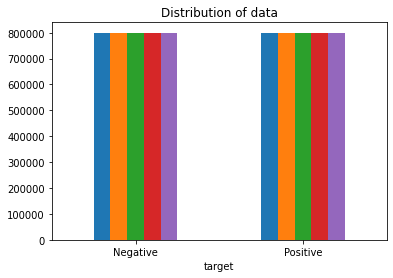

In [158]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

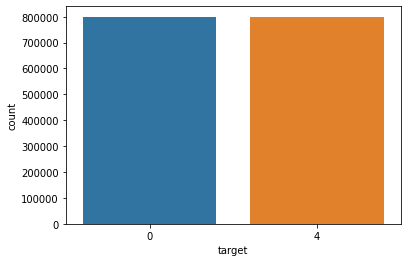

In [159]:
import seaborn as sns
sns.countplot(x='target', data=df)

# **Step-5: Data Preprocessing**

In the above-given problem statement before training the model, we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) for better results.

**5.1: Selecting the text and Target column for our further analysis**

In [160]:
data=df[['text','target']]

**5.3: Print unique values of target variables**

In [161]:
data['target'].unique()

array([0, 4])

**5.4: Separating positive and negative tweets**

In [162]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

**5.5: taking one fourth data so we can run on our machine easily**

In [163]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

**5.6: Combining positive and negative tweets**

In [164]:
dataset = pd.concat([data_pos, data_neg])

**5.7: Making statement text in lower case**

In [165]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

**5.8: Defining set containing all stopwords in English.**

In [166]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

**5.9: Cleaning and removing the above stop words list from the tweet text**

In [167]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, it's not behaving all. i'...
Name: text, dtype: object

**5.10: Cleaning and removing punctuations**

In [168]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

**5.11: Cleaning and removing repeating characters**

In [169]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

**5.12: Cleaning and removing URL’s**

In [170]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

**5.13: Cleaning and removing Numeric numbers**



In [171]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

**5.14: Getting tokenization of tweet text**




In [172]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0    [w, w]
1        []
2        []
3       [w]
4       [w]
Name: text, dtype: object

**5.15: Applying Stemming**


In [173]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

0    [w, w]
1        []
2        []
3       [w]
4       [w]
Name: text, dtype: object

**5.16: Applying Lemmatizer**

**5.17: Separating input feature and label**

In [176]:
X=data.text
y=data.target

**5.18: Plot a cloud of words for negative tweets**

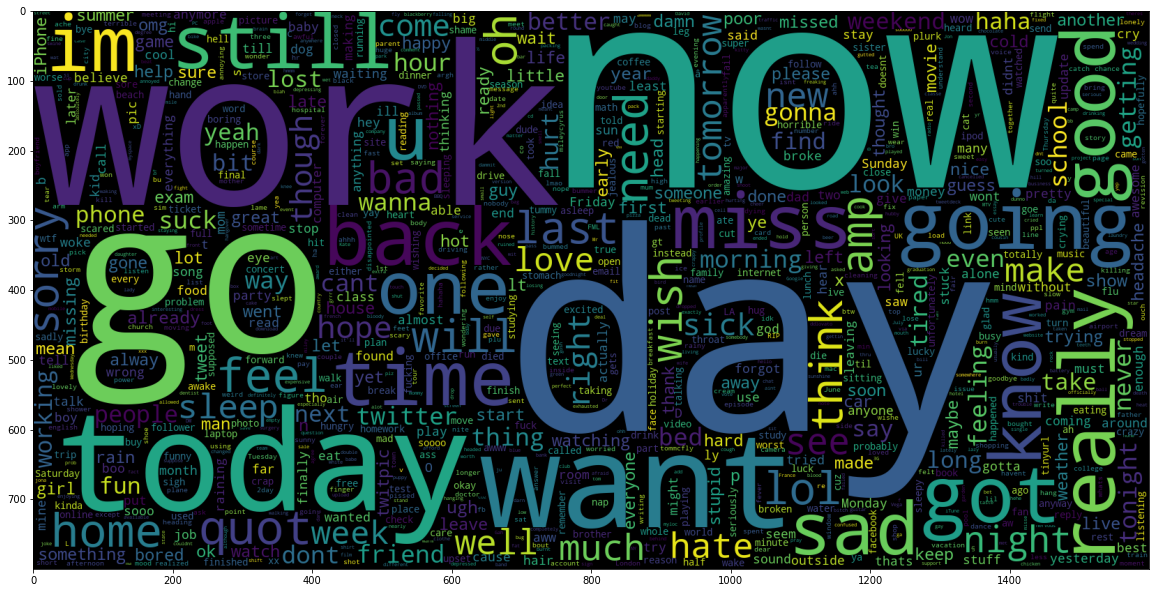

In [177]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

**5.19: Plot a cloud of words for positive tweets**

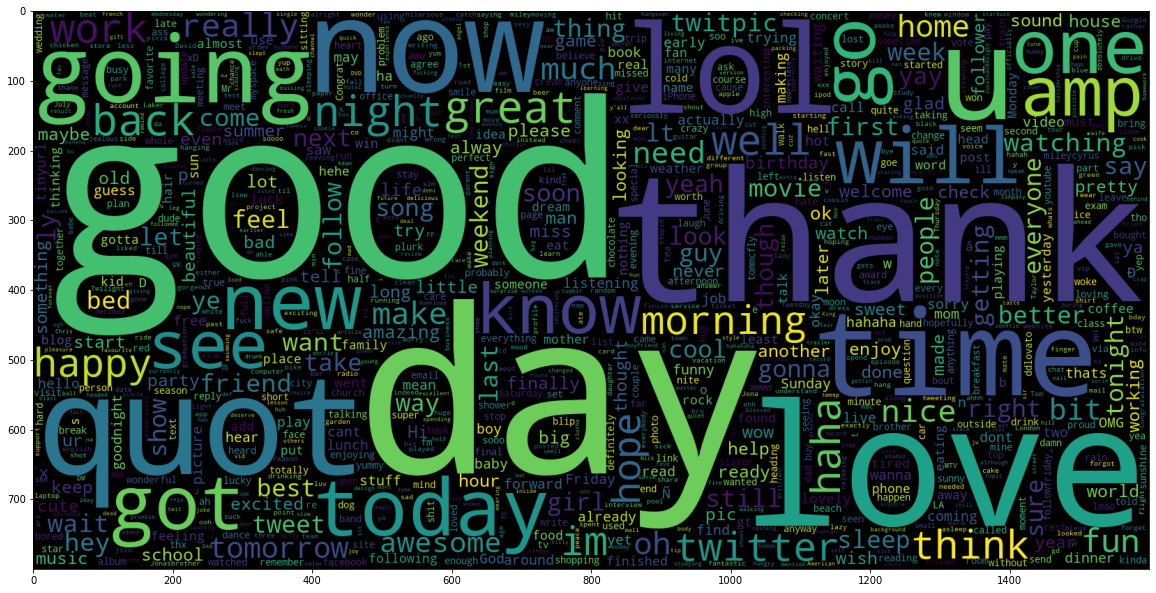

In [178]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)


# **Step-6: Splitting our data into Train and Test Subset**

In [184]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

# **Step-7: Transforming Dataset using TF-IDF Vectorizer**

**7.1: Fit the TF-IDF Vectorizer**




In [185]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


**7.2: Transform the data using TF-IDF Vectorizer**

In [186]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# **Step-8: Function For Model Evaluation**

After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

- Accuracy Score

- Confusion Matrix with Plot

- ROC-AUC Curve

In [190]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# **Step-9: Model Building**

In the problem statement we have used three different models respectively :

- Bernoulli Naive Bayes

- SVM (Support Vector Machine)

- Logistic Regression

The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models and then try to find out the one which gives the best performance among them.

**9.1: Model-1**

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           4       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



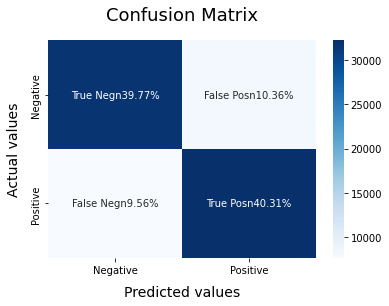

In [192]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

**9.2: Model-2:**

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           4       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



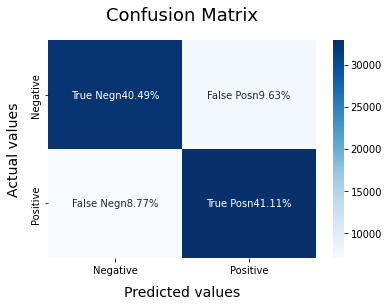

In [196]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

**9.3: Model-3**

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           4       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



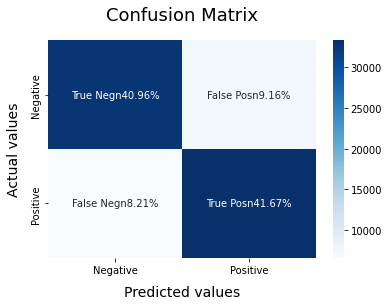

In [197]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)


# **Step-10: Conclusion**

Upon evaluating all the models we can conclude the following details i.e.

Accuracy:

 As far as the accuracy of the model is concerned Logistic Regression performs better than SVM which in turn performs better than Bernoulli Naive Bayes.

F1-score:

 The F1 Scores for class 0 and class 1 are :
(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)
(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

AUC Score: 

All three models have the same ROC-AUC score.


We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

